In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
get_ipython().run_line_magic('matplotlib', 'inline')

print('done')

done


In [2]:
#loading data 
wine = pd.read_csv('winequality-red.csv', sep=';')

print('data loaded')

data loaded


In [3]:
#first five rows
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#info on all data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#preprcess data
bins =(2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


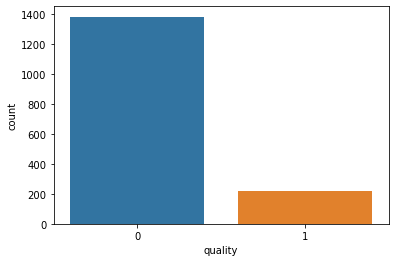

In [8]:
#plot out the new quality values
sns.countplot(wine['quality'])

In [9]:
#Now separate the dataset as response variable and feature variables
X = wine.drop('quality', axis=1)
y = wine['quality']

In [10]:
#train and test spliting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Applying Standard scaling to get optimized result
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

<h1> Random Forest Classifier </h1>

Here is the code to be used for the Random Forest Classifier. The parameter n_estimators simply determines how many forests are there in the tree. In my case, I have used 200. We shall then fit the X and the y that we used for training and use the model to predict the quality of the wine for those in the test set. We will then be comparing the predicted values vs the actuals through the use of the scoring metrics, such as the Confusion Matrix. We will talk more about this and accuracy later. For now, let us cover the two other algorithms.


In [11]:
rfc = RandomForestClassifier(n_estimators=200) 
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

<h2>Multi-Layer Perceptron Classifier (MLPC)</h2>

The one that concerns Deep Learning, or the Neural Networks wherein the input (the feature variables) go through a series of networks called the hidden layers and will eventually end up with an output or a single output. Each one is called a node and forms a network that of a brain neuron, hence it is called the neural networks. As an illustration:

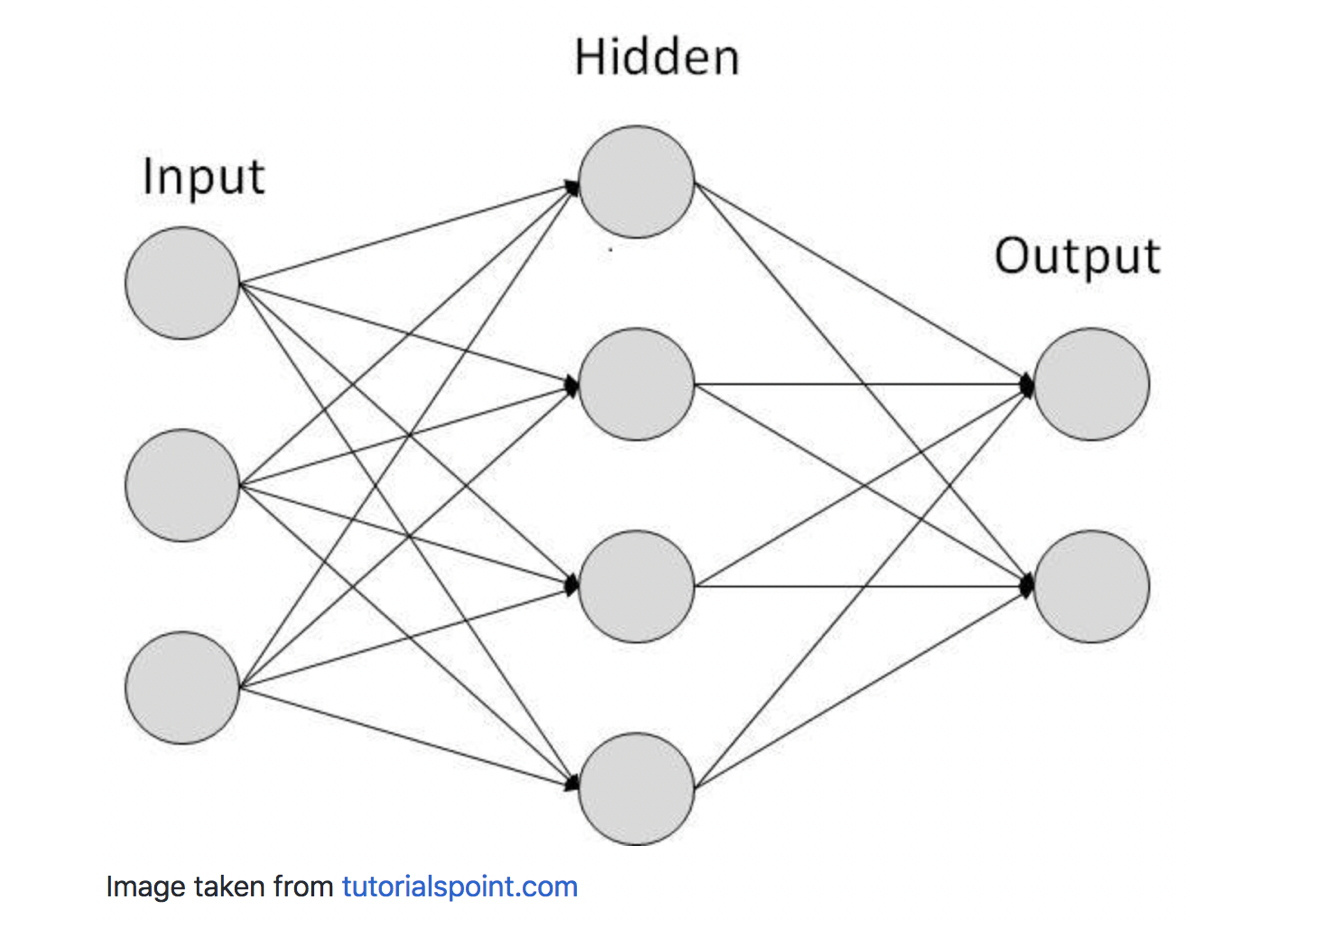


In [12]:
#predictions on first 20 of set 
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

<h1>Performance and Accuracy</h1>

The performance, or how well the model has performed is based off of three important metrics (thanks to our initial package imports!). The first is the Precision, the second is the Recall and the third is the F1-Score. All these are based of the Confusion Matrix, that compares the predicted values made by the model, and the actual values in the test set. There are four: the True Positive (or TP, which means that the model was able to predict a 1 while the actual value was also a 1), the True Negative (or TN, similar to TP but for 0s time), the False Positive (or FP, where the model predicts a 1 when it should have actually predicted a 0) and the False Negative (or FN, which is a vice versa of the previous). These four make up of the Confusion Matrix. You need not really know about it but the Precision and Recall are based off of the number of TP, TN, FP and FN that has been calculated and there is a formula for it, but it's not really necessary to know as SciKitLearn calculates it for you. The F1-Score is a score based off of Precision and Recall, and again formula is not of the essence.

If we would like a display of the calssification report and the confusion matrix, simply type in

In [13]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320

[[264   9]
 [ 22  25]]


<h1> SVM Classifier </h1>
fast easy works great on smaller numbers 

In [14]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [15]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf)) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


<h1> Nureal Network </h1>

In [16]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc)) 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       273
           1       0.54      0.55      0.55        47

    accuracy                           0.87       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.87      0.87      0.87       320

[[251  22]
 [ 21  26]]


<h1> Metrics </h1>

In [18]:
cm = accuracy_score(y_test, pred_rfc)
cm

0.903125

In [22]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [45]:
Xnew = [[8.5,0.280,0.0,1.8,0.096,35.0,103.8,0.9978,3.10,0.80,10.5]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew
if(ynew[0] == 0):
    print('oh noooo this is a bad wines')
else:
    print('fantastico annother fine wine for the table')

oh noooo this is a bad wines
